https://www.datacamp.com/community/tutorials/xgboost-in-python
does this tutorial

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [89]:
df = pd.read_csv('../data/df_samp.csv').head(100000)
df.head().transpose()

,0,1,2,3,4
site_id,0,0,0,0,0
building_id,7,31,55,96,103
primary_use,Education,Education,Office,Lodging/residential,Education
square_feet,121074,61904,16726,200933,21657
meter,chilledwater,chilledwater,chilledwater,chilledwater,chilledwater
timestamp,2016-02-29 09:00:00,2016-02-29 09:00:00,2016-02-29 09:00:00,2016-02-29 09:00:00,2016-02-29 09:00:00
meter_reading,1857.26,1097.47,337.683,1266.31,337.683
meter_reading_roll_avg,2219.77,1719.04,510.663,2245.43,349.27
outlier_ratio,0.836691,0.638421,0.661264,0.563951,0.966825
air_temperature,12.8,12.8,12.8,12.8,12.8


In [90]:
cat_columns = ['primary_use','meter','hour','weekday','month','wind_compass']

In [91]:
df_processed = pd.get_dummies(df, prefix_sep="_", columns=cat_columns)
df_processed.head().transpose()

,0,1,2,3,4
site_id,0,0,0,0,0
building_id,7,31,55,96,103
square_feet,121074,61904,16726,200933,21657
timestamp,2016-02-29 09:00:00,2016-02-29 09:00:00,2016-02-29 09:00:00,2016-02-29 09:00:00,2016-02-29 09:00:00
meter_reading,1857.26,1097.47,337.683,1266.31,337.683
...,...,...,...,...,...
wind_compass_Northwest,0,0,0,0,0
wind_compass_South,0,0,0,0,0
wind_compass_Southeast,0,0,0,0,0
wind_compass_Southwest,0,0,0,0,0


In [92]:
df_processed.columns

Index(['site_id', 'building_id', 'square_feet', 'timestamp', 'meter_reading',
       'meter_reading_roll_avg', 'outlier_ratio', 'air_temperature',
       'dew_temperature', 'sea_level_pressure', 'wind_speed', 'HDD', 'CDD',
       'primary_use_Education', 'primary_use_Lodging/residential',
       'primary_use_Office', 'meter_chilledwater', 'meter_electricity',
       'meter_hotwater', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'wind_compass_East', 'wind_compass_North',
       'wind_compass_Northeast', 'wind_co

In [93]:
X=df_processed.drop(['meter_reading','outlier_ratio','meter_reading_roll_avg','timestamp'],axis=1)
X.head().transpose()

,0,1,2,3,4
site_id,0.0,0.0,0.0,0.0,0.0
building_id,7.0,31.0,55.0,96.0,103.0
square_feet,121074.0,61904.0,16726.0,200933.0,21657.0
air_temperature,12.8,12.8,12.8,12.8,12.8
dew_temperature,8.9,8.9,8.9,8.9,8.9
...,...,...,...,...,...
wind_compass_Northwest,0.0,0.0,0.0,0.0,0.0
wind_compass_South,0.0,0.0,0.0,0.0,0.0
wind_compass_Southeast,0.0,0.0,0.0,0.0,0.0
wind_compass_Southwest,0.0,0.0,0.0,0.0,0.0


In [94]:
X.columns

Index(['site_id', 'building_id', 'square_feet', 'air_temperature',
       'dew_temperature', 'sea_level_pressure', 'wind_speed', 'HDD', 'CDD',
       'primary_use_Education', 'primary_use_Lodging/residential',
       'primary_use_Office', 'meter_chilledwater', 'meter_electricity',
       'meter_hotwater', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'wind_compass_East', 'wind_compass_North',
       'wind_compass_Northeast', 'wind_compass_Northwest',
       'wind_compass_South', 'wind_compass_Southeast',
       

In [95]:
y=df_processed['meter_reading']
y.head().transpose()

0    1857.260
1    1097.470
2     337.683
3    1266.310
4     337.683
Name: meter_reading, dtype: float64

In [ ]:
scores = []
model = XGBClassifier()
cv = KFold(n_splits=10, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X.values[train_index], X.values[test_index], y.values[train_index], y.values[test_index]
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    scores.append(r2_score(y_test,predictions))

Train Index:  [10000 10001 10002 ... 99997 99998 99999] 

Test Index:  [   0    1    2 ... 9997 9998 9999]


In [ ]:
print(scores)

In [67]:
scores = []
model = XGBClassifier()
cv = KFold(n_splits=10, random_state=42, shuffle=False)
cross_val_score(model, X.values, y.values, cv=10)

ValueError: continuous is not supported

In [10]:
seed=7
test_size=0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [12]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [14]:
y_pred=model.predict(X_test)
predictions = [round(value) for value in y_pred]
predictions

[3208.0,
 1351.0,
 0.0,
 844.0,
 760.0,
 2153.0,
 2490.0,
 1435.0,
 4305.0,
 2828.0,
 422.0,
 2195.0,
 4854.0,
 127.0,
 211.0,
 2279.0,
 3672.0,
 3335.0,
 1097.0,
 3926.0,
 633.0,
 338.0,
 2364.0,
 4685.0,
 3377.0,
 4685.0,
 3757.0,
 971.0,
 844.0,
 1942.0,
 3672.0,
 1182.0,
 718.0,
 3841.0,
 549.0,
 0.0,
 4348.0,
 2828.0,
 802.0,
 1773.0,
 4094.0,
 718.0,
 886.0,
 2617.0,
 844.0,
 718.0,
 1899.0,
 549.0,
 3799.0,
 1140.0,
 0.0,
 2322.0,
 1520.0,
 3292.0,
 3377.0,
 760.0,
 760.0,
 0.0,
 3335.0,
 0.0,
 3377.0,
 3208.0,
 971.0,
 844.0,
 1857.0,
 1520.0,
 507.0,
 1815.0,
 3208.0,
 3630.0,
 0.0,
 1013.0,
 1984.0,
 591.0,
 380.0,
 1140.0,
 4348.0,
 3166.0,
 2237.0,
 1435.0,
 3883.0,
 422.0,
 3419.0,
 1309.0,
 1097.0,
 4643.0,
 253.0,
 4263.0,
 1688.0,
 633.0,
 3292.0,
 2955.0,
 2701.0,
 0.0,
 507.0,
 0.0,
 1097.0,
 591.0,
 4812.0,
 1773.0,
 5023.0,
 1773.0,
 295.0,
 1055.0,
 4643.0,
 1393.0,
 1857.0,
 1688.0,
 2659.0,
 549.0,
 2153.0,
 3124.0,
 1393.0,
 549.0,
 3081.0,
 1013.0,
 0.0,
 2870.

In [15]:
explained_variance_score(y_test,predictions)

0.7202498623320243

In [16]:
mean_absolute_error(y_test,predictions)

474.3279426060606

In [17]:
r2_score(y_test,predictions)

0.7198320202160158

In [18]:
mean_squared_error(y_test,predictions,squared=False)

814.6393867482925

In [19]:
results = pd.DataFrame(data = {'actual':y_test,'predictions':predictions})

In [20]:
results = results.reset_index(drop=True).head(1000)

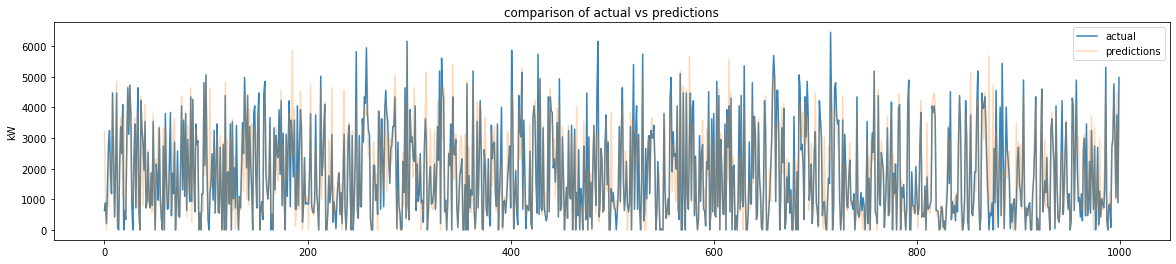

In [21]:
# line 1 points
plt.figure(figsize=(20,4))
x1 = results.index
y1 = results['actual']
# plotting the line 1 points 
plt.plot(x1, y1, label = "actual", alpha = .9)
# line 2 points
x2 = results.index
y2 = results['predictions']
# plotting the line 2 points 
plt.plot(x2, y2, label = "predictions", alpha = .3)

# Set the y axis label of the current axis.
plt.ylabel('kW')
# Set a title of the current axes.
plt.title('comparison of actual vs predictions')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
try kfold

https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833